# The regression model

When using a regression to fit a model to our data, the assumptions of regression analysis myst be satisfied in order to ensure good parameter estimates and accurate fit statistics. We would like parameters to be:
* unbiased (expected value over different samples is the true value)
* consistent (converging to the true value with many samples), and
* efficient (minimized variance)

Below we investigate the ways in which these assumptions can be violated and the effect on the parameters and fit statistics. We'll be using single-variable linear equations for the examples, but the same considerations apply to other models. We'll also assume that our model is correctly specified; that is, that the functional form we chose is valid. We discuss model specification errors along with the assumption violations and other problems that they cause in another notebook.

# Heteroskedasticity

Heteroskedasticity means that the variance of the error terms is not constant across observations. Intuitively, this means that the observations are not uniformly distributed along the regression line. It often occurs in cross-sectional data where the differences in the samples we are measuring lead to differences in the variance.

In [2]:
# Import all the libraries we'll be using
import numpy as np
import statsmodels.api as sm
from statsmodels import regression, stats
import matplotlib.pyplot as plt

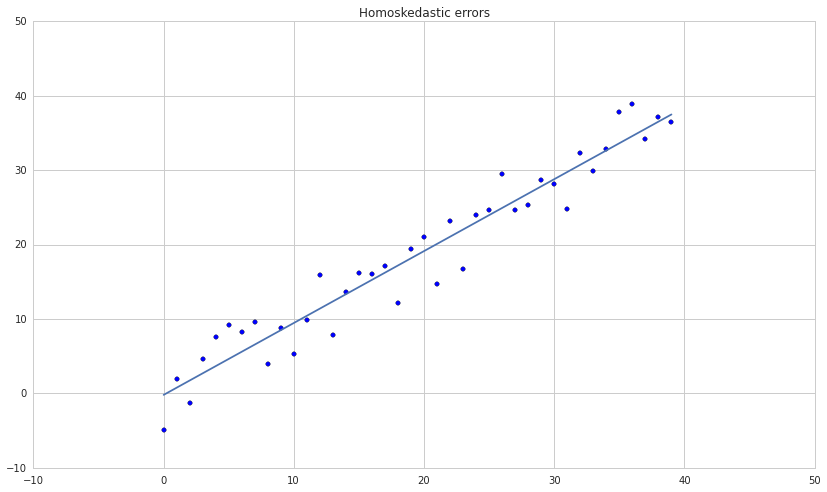

In [30]:
# Artificially create dataset with constant variance around a line
xs = np.arange(40)
y1 = xs + 3*np.random.randn(40)

# Get results of linear regression
slr1 = regression.linear_model.OLS(y1, sm.add_constant(xs)).fit()

# Construct the fit line
fit1 = slr1.params[0] + slr1.params[1]*xs

# Plot data and regression line
plt.scatter(xs, y1)
plt.plot(xs, fit1)
plt.title('Homoskedastic errors');

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     39.19
Date:                Thu, 09 Jul 2015   Prob (F-statistic):           2.51e-07
Time:                        16:37:27   Log-Likelihood:                -151.32
No. Observations:                  40   AIC:                             306.6
Df Residuals:                      38   BIC:                             310.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.3382      3.387     -0.100      0.921        -7.194     6.518
x1             0.9356      0.149      6.260      0.000         0.633     1.238
==============================================================================
Omnibus:                        1.626   Durbin-Watson:                   1.466
Prob(Omnibus):                  0.443   Jarque-Bera (JB):                0.722
Skew:                          -0.190   Prob(JB):                        0.697
Kurtosis:                       3.538   Cond. No.                         44.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

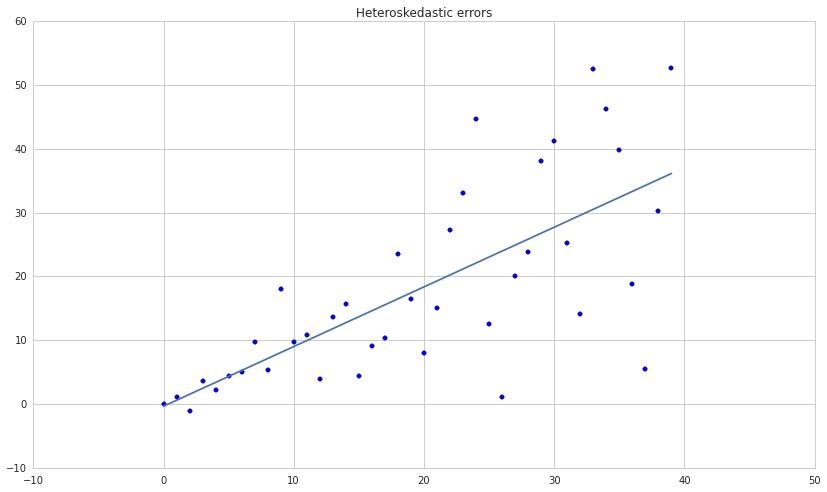

In [39]:
# Artificially create dataset with changing variance around a line
y2 = xs*(1 + .5*np.random.randn(40))

# Perform linear regression
slr2 = regression.linear_model.OLS(y2, sm.add_constant(xs)).fit()
fit2 = slr2.params[0] + slr2.params[1]*xs

# Plot data and regression line
plt.scatter(xs, y2)
plt.plot(xs, fit2)
plt.title('Heteroskedastic errors')

# Print summary of regression results
slr2.summary()

How does heteroskedasticity affect our analysis? The problematic situation, known as conditional heteroskedasticity, is when the error variance is correlated with the independent variables as it is above. This makes the F-test for regression significance and t-tests for the significances of individual coefficients unreliable. Most often this results in overestimation of the significance of the fit.

The Breusch-Pagan test and the White test can be used to detect conditional heteroskedasticity. If we suspect that this effect is present, we can alter our model to try and correct for it. One method is generalized least squares, which requires a manual alteration of the original equation. Another is computing robust standard errors, which corrects the fit statistics to account for the heteroskedasticity. `statsmodels` can compute robust standard errors; note the difference in the statistics below.

In [36]:
slr2.get_robustcov_results().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     13.05
Date:                Thu, 09 Jul 2015   Prob (F-statistic):           0.000876
Time:                        16:36:28   Log-Likelihood:                -154.44
No. Observations:                  40   AIC:                             312.9
Df Residuals:                      38   BIC:                             316.3
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.1193      2.169      1.438      0.159        -1.271     7.510
x1             0.6370      0.176      3.612      0.001         0.280     0.994
==============================================================================
Omnibus:                        9.773   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               10.340
Skew:                          -0.801   Prob(JB):                      0.00568
Kurtosis:                       4.907   Cond. No.                         44.5
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

# Serial correlation of errors

A common and serious problem is when errors are correlated across observations (known serial correlation or autocorrelation). This can occur, for instance, when some of the data points are related, or when we use time-series data with periodic fluctuations. If one of the independent variables depends on previous values of the dependent variable - such as when it is equal to the value of the dependent variable in the previous period - or if incorrect model specification leads to autocorrelation, then the coefficient estimates will be inconsistent and therefore invalid. Otherwise, the parameter estimates will be valid, but the fit statistics will be off. For instance, if the correlation is positive, we will have inflated F- and t-statistics, leading us to overestimate the significance of the model.

If the errors are homoskedastic, we can test for autocorrelation using the Durbin-Watson test, which is conveniently reported in the regression summary in `statsmodels`.

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Equity(33729 [DAL])   R-squared:                       0.660
Model:                             OLS   Adj. R-squared:                  0.659
Method:                  Least Squares   F-statistic:                     486.2
Date:                 Fri, 10 Jul 2015   Prob (F-statistic):           1.44e-60
Time:                         16:03:55   Log-Likelihood:                -610.08
No. Observations:                  252   AIC:                             1224.
Df Residuals:                      250   BIC:                             1231.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         31.0620      0.344     90.425      0.000        30.385    31.739
x1             0.0522      0.002     22.050      0.000         0.048     0.057
==============================================================================
Omnibus:                       30.398   Durbin-Watson:                   0.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.557
Skew:                          -0.748   Prob(JB):                     2.11e-10
Kurtosis:                       4.417   Cond. No.                         289.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

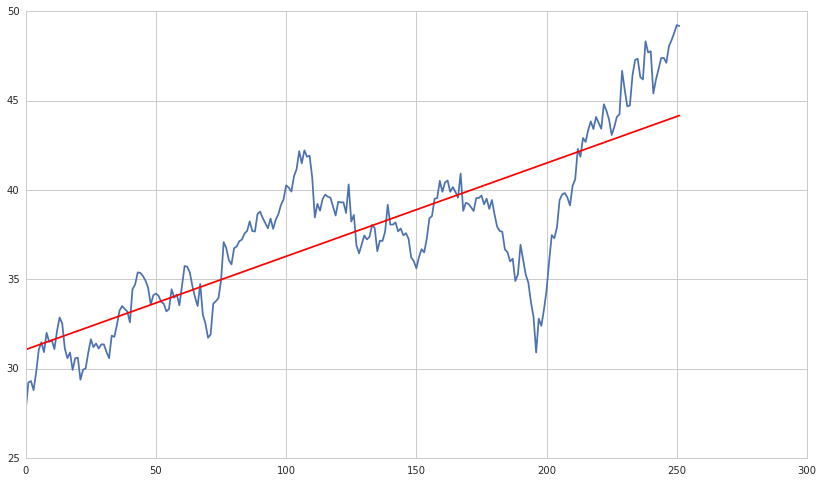

In [3]:
# Load pricing data for an asset
start = '2014-01-01'
end = '2015-01-01'
y = get_pricing('DAL', fields='price', start_date=start, end_date=end)
x = np.arange(len(y))

# Regress pricing data against time
model = regression.linear_model.OLS(y, sm.add_constant(x)).fit()

# Construct the fit line
prediction = model.params[0] + model.params[1]*x

# Plot pricing data and regression line
plt.plot(x,y)
plt.plot(x, prediction, color='r')

# Print summary of regression results
model.summary()

The Durbin-Watson statistic being approximately 0 tells us that the errors are positively correlated, and we can confirm that the statistic is significant by checking against critical values of the statistic from a table.

We can attempt to change the regression equation to eliminate serial correlation. A simpler fix is adjusting the standard errors using an appropriate method and using the adjusted values to check for significance. Below we use the Newey-West method from `statsmodels` to compude adjusted standard errors for the coefficients. They are higher than those originally reported by the regression, which is what we expected for positively correlated errors.

In [63]:
from math import sqrt

# Find the covariance matrix of the coefficients
cov_mat = stats.sandwich_covariance.cov_hac(model)

# Print the standard errors of each coefficient from the original model and from the adjustment
print 'Old standard errors:', model.bse[0], model.bse[1]
print 'Adjusted standard errors:', sqrt(cov_mat[0,0]), sqrt(cov_mat[1,1])

Old standard errors: 0.343510916163 0.00236807424591
Adjusted standard errors: 0.507679344438 0.00511956168035


# Errors not normally distributed

If the error term is not normally distributed, then our tests of statistical significance will be off. Fortunately, the central limit theorem tells us that, for large enough data samples, the coefficient distributions will be close to normal even if the errors are not. Therefore our analysis will still be valid for large data datasets.

 # Multicollinearity

When using multiple independent variables, it is important to check for multicollinearity; that is, an approximate linear relation between the independent variables, such as
$$ X_2 \approx 5 X_1 - X_3 + 4.5 $$

With multicollinearity, it is difficult to identify the independent effect of each variable, since we can change around the coefficients according to the linear relation without changing the model. As with truly unnecessary variables, this will usually not hurt the accuracy of the model, but will cloud our analysis. In particular, the estimated coefficients will have large standard errors. The coefficients will also no longer represent the partial effect of each variable, since with multicollinearity we cannot change one variable while holding the others constant.

High correlation between independent variables is indicative of multicollinearity. However, it is not enough, since we would want to detect correlation between one of the variables and a linear combination of the other variables. If we have high R-squared but low t-statistics on the coefficients (the fit is good but the coefficients are not estimated precisely) we may suspect multicollinearity. To resolve the problem, we can drop one of the independent variables involved in the linear relation.

For instance, using two stock indices as our independent variables is likely to lead to multicollinearity. Below we can see that removing one of them improves the t-statistics without hurting R-squared.

R-squared: 0.887802860768
t-statistics of coefficients:
const   -11.676469
x1       24.201404
x2       -5.862084
dtype: float64


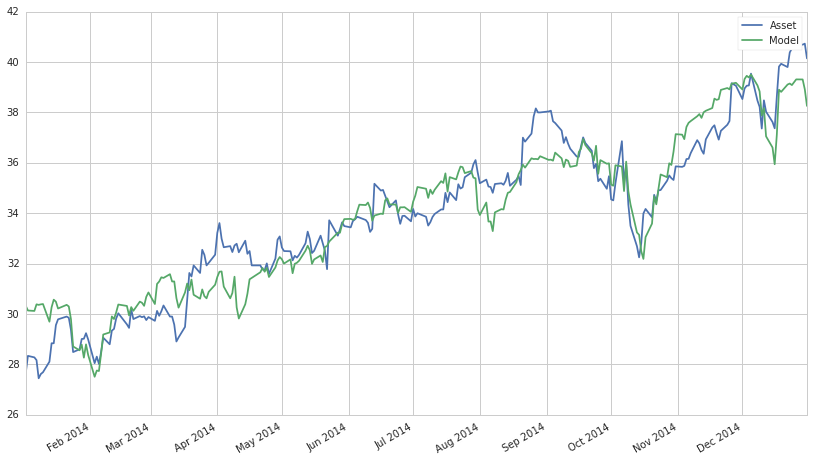

In [40]:
# Load pricing data for asset and two market indices
start = '2014-01-01'
end = '2015-01-01'
b1 = get_pricing('SPY', fields='price', start_date=start, end_date=end)
b2 = get_pricing('MDY', fields='price', start_date=start, end_date=end)
a = get_pricing('HPQ', fields='price', start_date=start, end_date=end)

# Run multiple linear regression
mlr = regression.linear_model.OLS(a, sm.add_constant(np.column_stack((b1,b2)))).fit()

# Construct fit curve using dependent variables and estimated coefficients
mlr_prediction = mlr.params[0] + mlr.params[1]*b1 + mlr.params[2]*b2

# Print regression statistics 
print 'R-squared:', mlr.rsquared_adj
print 't-statistics of coefficients:\n', mlr.tvalues

# Plot asset and model
a.plot()
mlr_prediction.plot()
plt.legend(['Asset', 'Model']);

R-squared: 0.872829465873
t-statistics of coefficients:
const                -21.616393
Equity(8554 [SPY])    41.517799
dtype: float64


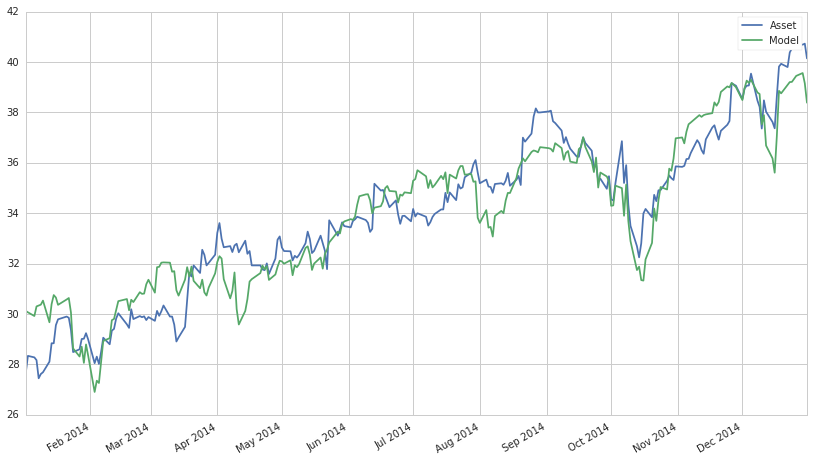

In [41]:
# Perform linear regression
slr = regression.linear_model.OLS(a, sm.add_constant(b1)).fit()
slr_prediction = slr.params[0] + slr.params[1]*b1

# Print fit statistics
print 'R-squared:', slr.rsquared_adj
print 't-statistics of coefficients:\n', slr.tvalues

# Plot asset and model
a.plot()
slr_prediction.plot()
plt.legend(['Asset', 'Model']);

# Example: Anscombe's quartet

Anscombe constructed 4 datasets which not only have the same mean and variance in each variable, but also the same correlation coefficient, regression line, and R-squared regression value. Below, we test this result as well as plotting the datasets. A quick glance at the graphs shows that only the first dataset satisfies the regression model assumptions. Consequently, the high R-squared values of the other three are not meaningful, which agrees with our intuition that the other three are not modeled well by the lines of best fit.

Cofficients: [ 3.00009091  0.50009091] [ 3.00090909  0.5       ] [ 3.00245455  0.49972727] [ 3.00172727  0.49990909]
Pearson r: 0.816420516345 0.816236506 0.81628673949 0.816521436889
R-squared: 0.666542459509 0.666242033727 0.666324041067 0.666707256898


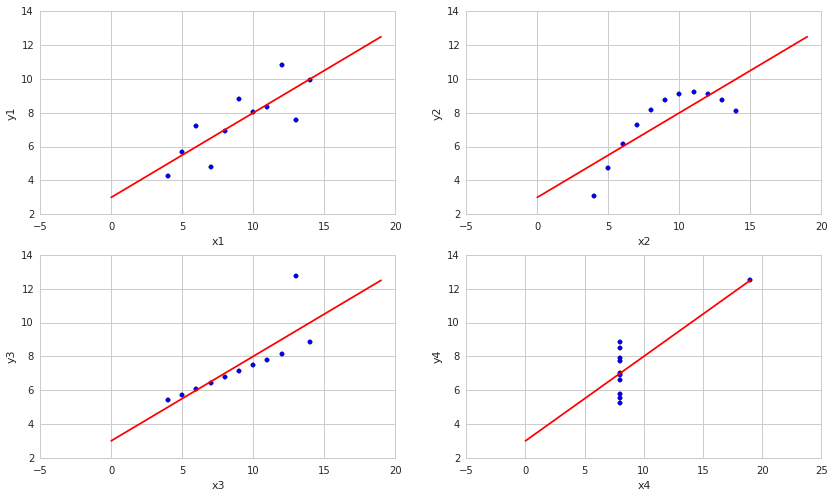

In [28]:
from scipy.stats import pearsonr

# Construct Anscombe's arrays
x1 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
x2 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
x3 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

# Perform linear regressions on the datasets
slr1 = regression.linear_model.OLS(y1, sm.add_constant(x1)).fit()
slr2 = regression.linear_model.OLS(y2, sm.add_constant(x2)).fit()
slr3 = regression.linear_model.OLS(y3, sm.add_constant(x3)).fit()
slr4 = regression.linear_model.OLS(y4, sm.add_constant(x4)).fit()

# Print regression coefficients, Pearson r, and R-squared for the 4 datasets
print 'Cofficients:', slr1.params, slr2.params, slr3.params, slr4.params
print 'Pearson r:', pearsonr(x1, y1)[0], pearsonr(x2, y2)[0], pearsonr(x3, y3)[0], pearsonr(x4, y4)[0]
print 'R-squared:', slr1.rsquared, slr2.rsquared, slr3.rsquared, slr4.rsquared

# Plot the 4 datasets with their regression lines
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
xs = np.arange(20)
ax1.plot(slr1.params[0] + slr1.params[1]*xs, 'r')
ax1.scatter(x1, y1)
ax1.set_xlabel('x1')
ax1.set_ylabel('y1')
ax2.plot(slr2.params[0] + slr2.params[1]*xs, 'r')
ax2.scatter(x2, y2)
ax2.set_xlabel('x2')
ax2.set_ylabel('y2')
ax3.plot(slr3.params[0] + slr3.params[1]*xs, 'r')
ax3.scatter(x3, y3)
ax3.set_xlabel('x3')
ax3.set_ylabel('y3')
ax4.plot(slr4.params[0] + slr4.params[1]*xs, 'r')
ax4.scatter(x4,y4)
ax4.set_xlabel('x4')
ax4.set_ylabel('y4');